In [63]:
%matplotlib inline
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.core.display import display, HTML

# Probability 02 - 1D Data

There are a few useful indicators which we can use to describe data.

## 1. The *center* of data

### 1.1 Mean

The mean (*sample mean*) or also *average* is defined as

$$
\overline{x} = \frac{1}{n}\sum_N^i{x_i}
$$

### 1.2. Median

The median is defined as **the value that lies exactly in the middle of our data, when ordered by size**. However, if the data consists of an even number of values, we take the average of the two middle values instead.

The median is useful whenever we have high *outliers* in our data. For example, if students' scores at a given test were `[24, 25, 23, 28, 98]`, the average would be around 39, which doesn't accurately describe our data, while the mean would be 25, which is a good indicator of the general performance of all students.

### 1.3. Mode

The mode is defined as **the value(s) that occurs (occur) most frequently** in the dataset. By its nature, it is useful when describing qualitative data, but does not have much use with quantitative data, because quantitative data contains very few or no duplicates of the same value (however it can be useful in conjunction with a *frequency distribution*).

---

In [70]:
scores = pd.Series([50, 52, 53, 51, 45, 43, 38, 60])
display(pd.DataFrame(scores))
print(f"Mean: {scores.mean()}\nMedian: {scores.median()}\nModes:\n{scores.mode()}")
print("Quantitive data mode is not very useful")

0
0  50
1  52
2  53
3  51
4  45
5  43
6  38
7  60

Mean: 49.0
Median: 50.5
Modes:
0    38
1    43
2    45
3    50
4    51
5    52
6    53
7    60
dtype: int64
Quantitive data mode is not very useful


In [72]:
appleColors = pd.Series(['red', 'red', 'green', 'red', 'blue', 'green', 'blue', 'red'])
display(pd.DataFrame(appleColors))
print(f"Mode: {appleColors.mode()}")
print("Qualitative data mode gives us meaningful information")

0
0    red
1    red
2  green
3    red
4   blue
5  green
6   blue
7    red

Mode: 0    red
dtype: object
Qualitative data mode gives us meaningful information


## 2. The *variation* in data

If we had a class of students with test scores `[40,  45, 50, 55, 60]` and a class with scores `[0, 0, 50, 100, 100]`. we would get the same mean and median for both datasets, even though they express wildly different things. In such cases, we need to describe the variety of values in our data.

### 2.1. Deviation

The first step towards finding the variation in our data is finding the **deviation** of each value. The deviation for a value is defined as the difference between that value and the mean, e.g. for a dataset with mean 50, the deviation of 60 is 10, the deviation of 40 is -10 and so on.

Now that we have each point's deviation, we want to summarize this into one value. However, when we try to take the deviation's mean:

$$
\frac{1}{n}\sum_N^i{\Big[ x_i - \overline{x}\Big]} = \frac{1}{n}\sum_N^i{x_i} - \frac{1}{n}\sum_N^i{\overline{x}} = \overline{x} - \overline{x} = 0
$$

we see that it is zero.

### 2.2. Variance

Since the mean of the deviation doesn't tell us anything, we need to think of a new value.

First of all, we can say that a deviation of 1 and a deviation of -1 are equivalent - they show the same *variation*. So we can take the absolute value of the deviation instead. However, since the absolute value is a bit hard to use in formulas (for example it is not continuous), we can instead take the square of the deviation. This gives us:

$$
S^2 = \sum_N^i{(x_i - \overline{x})^2}
$$

We call this the **variance**, or more specifically the *sample variance*.

However, there are actually two types of variance: **sample variance** and **unbiased variance**. The unbiased variance is very important, albeit a bit complicated, so we will delay the explanation to a later point. Meanwhile, whenever we use the unbiased variance, we will specify `ddof=1` in pandas or numpy's variance functions.

### 2.3. Standard Deviation

The mean of the data gives us a value in the same *units* as the original data. However, the variance gives us a value that is in square units, e.g. 30 test points squared, which does not tell us much. In order to get a value that tells us about the variance in data and is in the same units, we introduce the **standard deviation** defined as:

$$
S = \sqrt{S^2} = \sqrt{\frac{1}{n}\sum_n^i{(x_i - \overline{x})^2}}
$$

Now we can think about the standard deviation in the same dimension as the original data. A good example of this are the so called **$\sigma$ intervals**. Whenever a data point lies within 1 standard deviation of the mean, we say that it is in the 1-$\sigma$ interval. If it lies within 2 standard deviations of the mean, then it is in the 2-$\sigma$ interval, and so on.


## 3. Range and Interquartile Range

### 3.1. Range

The **range** of a data allows us to describe the variance in data very easily, albeit it is prone to errors when there are outliers. It is defined as:

$$
Rg = x_{max} - x_{min}
$$

### 3.2. Interquartile Range

Since the range only takes into account the maximum and minimum values, even a single outlier can drastically change its value. Therefore, we should really be looking at the top X% versus bottom Y% of data. The **interquartile range** is the range enclosed by the 25th and 75th *percentile* (the value below which X% of all values lie). 

$$
IQR = Q_3 - Q_1
$$

Generally, we call the 25th, 50th and 75th percentiles $Q_1$ (first quartile), $Q_2$ (second quartile) and $Q_3$ (third quartile) respectively. Naturally, the 2nd quartile corresponds to the median. Therefore the IQR tells us the variance with respect to the median.

## 4. Normalization

Getting 60 points on a test with a mean of 30, and getting 60 points on a test with a mean of 60 are two totally different things. Even though the absolute score is the same, the relative performance is different.

**Normalization** allows us to express the relative value of a variable regardless of its mean or variance.

### 4.1. Standardization

The process of subtracting the mean from every data point $x_i$ and then dividing by the standard deviation is called **standardization** and the standardized data is often called **z-score**. The formula for this looks like this:

$$
z_i = \frac{x_i - \overline{x}}{S}
$$

Standardized data has a mean of 0 and a standard deviation of 1, but it is **not** in the same units as the original data.

## 5. Visualization of 1D data

### 5.1. Frequency Distribution

A **frequency distribution** is the process of dividing data into certain intervals and counting how many values fall within each one. We call these intervals **classes** and the number of values within an interval **frequency**. Additionally, the range of a class is called its **width**.

Frequency distributions are often accompanied by the following statistics:

- **Class value** - the center value of each class
- **Relative Frequency** - the frequency of each interval divided by the total number of data points
- **Cumulative Relative Frequency** - the frequency of each interval and all the intervals below it

Given a frequency distribution, we can now talk about the *mode* of quantitative data. The mode in this case is defined as the the class value of the most populated class. However it is worth noting that the mode here depends on the number of classes chosen.

Finally, a frequency distribution is often represented by a *histogram*.

Taking all of the above into account, now we can draw the histogram for a set of students' test scores.

freq  cls_val  rel_freq  cum_rel_freq
0~10       0        5  0.000000      0.000000
10~20      1       15  0.033333      0.033333
20~30      2       25  0.066667      0.100000
30~40      6       35  0.200000      0.300000
40~50      7       45  0.233333      0.533333
50~60      7       55  0.233333      0.766667
60~70      3       65  0.100000      0.866667
70~80      2       75  0.066667      0.933333
80~90      2       85  0.066667      1.000000
90~100     0       95  0.000000      1.000000

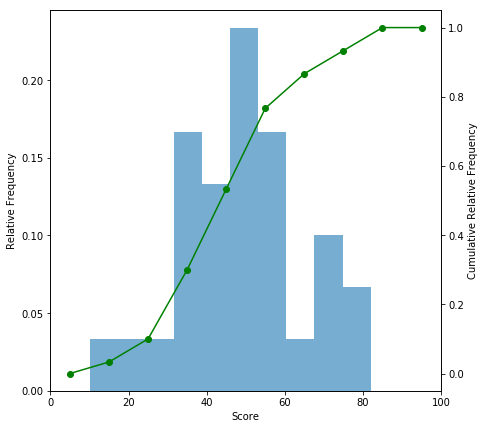

In [124]:
scores = np.array([
    50, 51, 48, 43, 44, 60, 68, 58, 57, 80,
    23, 35, 34, 33, 47, 43, 55, 59, 49, 73,
    10, 26, 38, 46, 52, 35, 39, 82, 74, 61
])
freq,_ = np.histogram(scores, bins=10, range=(0, 100))
freq = {f"{i*10}~{(i+1)*10}":f for i,f in enumerate(freq)}
data = pd.DataFrame.from_dict(freq, orient='index', columns=['freq'])
data['cls_val'] = [i + 5 for i in range(0, 100, 10)]
data['rel_freq'] = data['freq'] / data['freq'].sum()
data['cum_rel_freq'] = data['rel_freq'].cumsum()
display(data)

fig,ax = plt.subplots(1, 1, figsize=(7, 7))
weights = np.ones_like(scores) / len(scores)
ax.hist(scores, bins=10, alpha=.6, weights=weights)
ax.set_xlim(0, 100)
ax.set_xlabel('Score')
ax.set_ylabel('Relative Frequency')
ax1 = ax.twinx()
ax1.set_ylabel('Cumulative Relative Frequency')
ax1.plot(data['cls_val'], data['cum_rel_freq'], marker='o', color='green')

### 5.2. Box Plot

Box plots allows us to see the variance of data - it shows us the distribution and outliers. The box spans the range from $Q_1$ to $Q_3$, while the whiskers span the range from $Q_1 - 1.5IQR$ to $Q_3 + 1.5IQR$. The line in the middle of the box is the median. The values that do not fall within any this range are considered outliers and shown as dots.

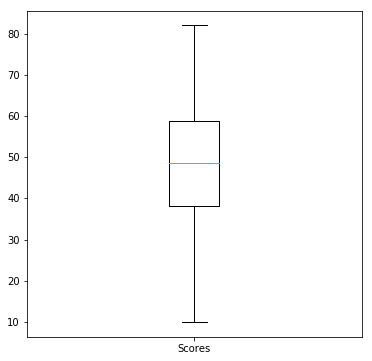

In [128]:
fig,ax = plt.subplots(1, 1, figsize=(6, 6))
_ = ax.boxplot(scores, labels=['Scores'])